In [1]:
import pandas as pd
import arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analiza braków danych – Titanic
Celem analizy jest określenie rodzaju brakujących danych w zbiorze Titanic.


In [2]:
with open("Dane_Titanic.arff", "r") as file:
    data = arff.load(file)

df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])
display(df.head(20))

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,None,NaN,"Belfast, NI"
8,1.0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,None,C,None,22.0,"Montevideo, Uruguay"


# 1. Wstępna inspekcja danych

Zbiór danych składa się z 14 cech opisujących pasażerów Titanica. Obejmuje informacje m.in. o klasie biletu (pclass), płci (sex), wieku (age), miejscu docelowym (home.dest) czy przynależności do łodzi ratunkowej (boat). Na podstawie pierwszych 20 obserwacji można zauważyć obecność brakujących wartości m.in. w kolumnach age, cabin, boat, body i home.dest.

In [3]:
missing_values_count = df.isnull().sum()
missing_values_percent = df.isnull().mean() * 100

missing_summary = pd.DataFrame({
    'Brakujące (liczba)': missing_values_count,
    'Brakujące (%)': missing_values_percent.round(2)
})

missing_summary

,Brakujące (liczba),Brakujące (%)
pclass,0,0.00
survived,0,0.00
name,0,0.00
sex,0,0.00
age,263,20.09
sibsp,0,0.00
parch,0,0.00
ticket,0,0.00
fare,1,0.08
cabin,1014,77.46


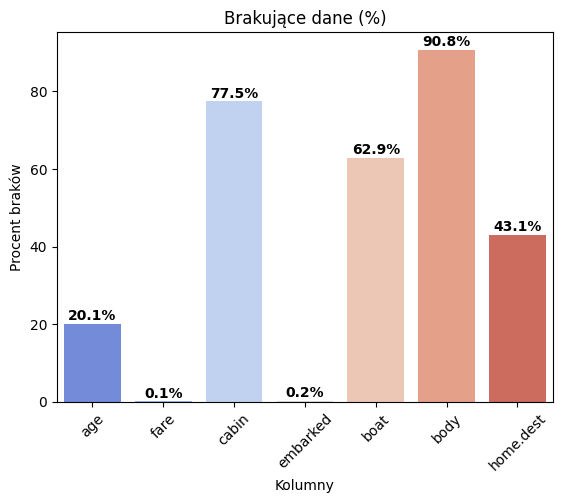

In [26]:
missing = df.isnull().mean() * 100
missing = missing[missing > 0]  

ax = sns.barplot( x = missing.index, y = missing.values, hue = missing.index, palette="coolwarm", legend=False)

plt.title('Brakujące dane (%)')
plt.ylabel('Procent braków')
plt.xlabel('Kolumny')
plt.xticks(rotation=45)

for i, v in enumerate(missing.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha = 'center', fontweight = 'bold')

plt.show()

# 2. Sprawdzenie braków danych


# Kolumna `age`

In [5]:
df['age_null'] = np.where(df['age'].isnull(), 1, 0)
age_by_survived = df.groupby('survived')['age_null'].mean().round(2) * 100
age_by_survived = age_by_survived.reset_index()
age_by_survived.columns = ['Przeżył (0 = nie, 1 = tak)', 'Braki wieku (%)']
age_by_survived


,"Przeżył (0 = nie, 1 = tak)",Braki wieku (%)
0,0,23.0
1,1,15.0


#### Zależność od przeżycia:
- Osoby, które **nie przeżyły** katastrofy, miały **częściej brakujące dane o wieku (23%)**.
- Dla pasażerów, którzy **przeżyli**, odsetek ten wynosił tylko **15%**.
  
Może to sugerować, że dane uzupełniano **częściej dla ocalałych**, np. na podstawie późniejszych wywiadów lub dokumentów.



In [6]:
age_by_pclass = df.groupby('pclass')['age_null'].mean().round(2) * 100
age_by_pclass = age_by_pclass.reset_index()
age_by_pclass.columns = ['Klasa', 'Braki wieku (%)']
age_by_pclass

,Klasa,Braki wieku (%)
0,1.0,12.0
1,2.0,6.0
2,3.0,29.0


#### Zależność od klasy podróży:
- W **3. klasie** braki wieku wynoszą aż **29%** – to zdecydowanie więcej niż w **1. klasie (5%)**.
- Wskazuje to na różnice w dokumentowaniu danych między pasażerami różnych klas – **wyższe klasy mogły mieć lepszą rejestrację i obsługę**.



In [7]:
age_by_sibsp = df.groupby('sibsp')['age_null'].mean().round(2) * 100
age_by_sibsp = age_by_sibsp.reset_index()
age_by_sibsp.columns = ['Liczba rodzeństwa/małżonków', 'Braki wieku (%)']
age_by_sibsp


,Liczba rodzeństwa/małżonków,Braki wieku (%)
0,0.0,23.0
1,1.0,12.0
2,2.0,14.0
3,3.0,20.0
4,4.0,0.0
5,5.0,0.0
6,8.0,89.0


In [8]:
age_by_parch = df.groupby('parch')['age_null'].mean().round(2) * 100
age_by_parch = age_by_parch.reset_index()
age_by_parch.columns = ['Liczba rodziców/dzieci', 'Braki wieku (%)']
age_by_parch


,Liczba rodziców/dzieci,Braki wieku (%)
0,0.0,23.0
1,1.0,6.0
2,2.0,14.0
3,3.0,0.0
4,4.0,17.0
5,5.0,0.0
6,6.0,0.0
7,9.0,100.0


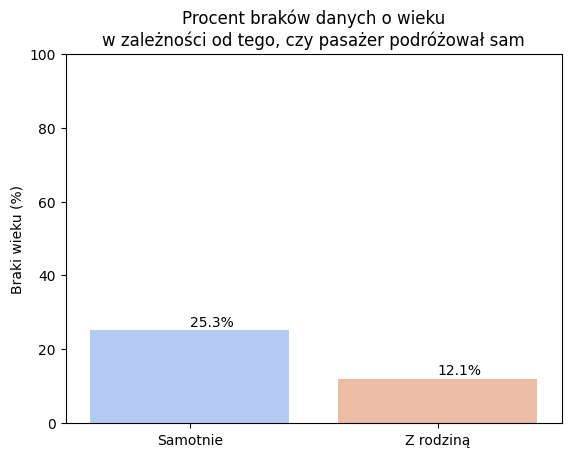

In [25]:
df['age_null'] = np.where(df['age'].isnull(), 1, 0)
df['samotnie'] = np.where((df['parch'] == 0) & (df['sibsp'] == 0), 'Samotnie', 'Z rodziną')

age_missing_by_group = df.groupby('samotnie')['age_null'].mean().round(3) * 100
age_missing_by_group = age_missing_by_group.reset_index()
age_missing_by_group.columns = ['Podróżował', 'Braki wieku (%)']

sns.barplot(data=age_missing_by_group, x='Podróżował', y='Braki wieku (%)', hue ='Podróżował', palette='coolwarm')

for index, row in age_missing_by_group.iterrows():
    plt.text(index, row['Braki wieku (%)'] + 1, f"{row['Braki wieku (%)']:.1f}%")

plt.title('Procent braków danych o wieku\nw zależności od tego, czy pasażer podróżował sam')
plt.ylabel('Braki wieku (%)')
plt.xlabel('')
plt.ylim(0, 100)
plt.show()

#### Zależność od towarzyszy podróży (`parch`, `sibsp`):
- Osoby podróżujące **samotnie** (`parch = 0` i `sibsp = 0`) częściej miały brakujące dane o wieku.
- Może to wynikać z tego, że trudniej było określić wiek pasażera, jeśli nie podróżował z rodziną lub małżonkiem.


### Wniosek – kolumna `age`

Analiza braków danych w kolumnie `age` wykazuje istotne różnice w zależności od innych zmiennych:

- Wśród pasażerów **1. klasy** braki w wieku są relatywnie rzadkie – odsetek braków jest znacznie niższy niż w niższych klasach.
- W **2. i 3. klasie** brakuje danych o wieku w większym odsetku przypadków – szczególnie widoczne jest to w 3. klasie, gdzie procedury ewidencyjne mogły być mniej dokładne.
- Możliwa jest również zależność między brakiem danych a statusem przeżycia (`survived`), chociaż nie jest ona tak silna jak w przypadku zmiennej `pclass`.

### Typ brakujących danych

Braki danych w kolumnie `age` **nie są całkowicie losowe**, ponieważ są związane z innymi obserwowalnymi zmiennymi (np. klasą podróży). Oznacza to, że mamy do czynienia z:

> **MAR (Missing At Random)** – brak danych zależy od innych znanych zmiennych (np. `pclass`, `parch`, `sibsp`), ale nie od samej wartości `age`.


# Kolumna `cabin`

In [10]:
df['cabin_null'] = np.where(df['cabin'].isnull(), 1, 0)
cabin_by_survived = df.groupby('survived')['cabin_null'].mean().round(2) * 100
cabin_by_survived = cabin_by_survived.reset_index()
cabin_by_survived.columns = ['Przeżył (0 = nie, 1 = tak)', 'Braki cabin (%)']
cabin_by_survived


,"Przeżył (0 = nie, 1 = tak)",Braki cabin (%)
0,0,87.0
1,1,61.0


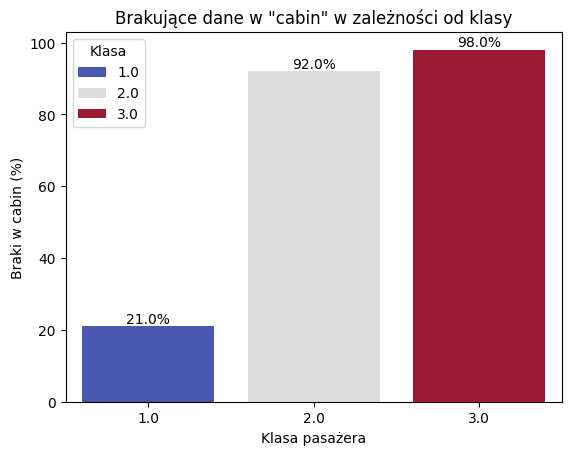

In [21]:
cabin_by_pclass = df.groupby('pclass')['cabin_null'].mean().round(2) * 100
cabin_by_pclass = cabin_by_pclass.reset_index()
cabin_by_pclass.columns = ['Klasa', 'Braki w cabin (%)']

ax = sns.barplot( data=cabin_by_pclass,  x='Klasa',  y='Braki w cabin (%)', hue = 'Klasa',  palette="coolwarm" )

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.ylabel('Braki w cabin (%)')
plt.xlabel('Klasa pasażera')
plt.title('Brakujące dane w "cabin" w zależności od klasy')
plt.show()


### Wniosek – kolumna `cabin`

Na podstawie wykresu można zauważyć wyraźną zależność między klasą podróży a częstością brakujących danych w kolumnie `cabin`:

- W **1. klasie** braki dotyczą jedynie **21%** pasażerów — dane są w dużej mierze kompletne.
- W **2. klasie** odsetek braków wzrasta do **92%**, co wskazuje na znaczące ubytki informacji.
- W **3. klasie** niemal **98%** pasażerów nie ma przypisanej kabiny.

Taki rozkład sugeruje, że braki danych w kolumnie `cabin` **nie są losowe** – są silnie powiązane z klasą podróży. Może to wynikać z niższej dokładności dokumentacji dla pasażerów niższych klas lub z faktu, że nie wszystkim przypisywano konkretne kabiny.

### Typ brakujących danych

Braki w kolumnie `cabin` zależą od innych zmiennych w zbiorze (np. `pclass`, `survived`), co oznacza, że mamy do czynienia z:

> **MNAR (Missing Not At Random)** – brak danych zależy od innych, znanych zmiennych w zbiorze. Brak kabiny może wskazywać na niższy status społeczny lub mniejszą szansę na przeżycie, co czyni tę zmienną potencjalnie informacyjną i istotną w analizie.

# Kolumna `boat`

In [12]:
df['boat_null'] = np.where(df['boat'].isnull(), 1, 0)

boat_by_survived = df.groupby('survived')['boat_null'].mean().round(2) * 100
boat_by_survived = boat_by_survived.reset_index()
boat_by_survived.columns = ['Przeżył (0 = nie, 1 = tak)', 'Braki boat (%)']
boat_by_survived



,"Przeżył (0 = nie, 1 = tak)",Braki boat (%)
0,0,99.0
1,1,5.0


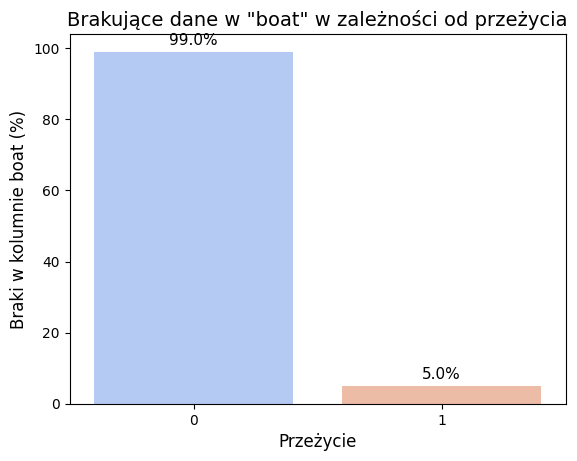

In [20]:
sns.barplot(data=boat_by_survived, x='Przeżył (0 = nie, 1 = tak)', y='Braki boat (%)', hue = 'Przeżył (0 = nie, 1 = tak)', palette='coolwarm')

plt.title('Brakujące dane w "boat" w zależności od przeżycia', fontsize=14)
plt.xlabel('Przeżycie', fontsize=12)
plt.ylabel('Braki w kolumnie boat (%)', fontsize=12)

for index, row in boat_by_survived.iterrows():
    plt.text(index, row['Braki boat (%)'] + 2, f"{row['Braki boat (%)']}%", ha='center', fontsize=11)
plt.show()

### Wniosek – kolumna `boat`

Analiza braków danych w kolumnie `boat` ujawnia silną zależność od zmiennej `survived`:

- Wśród **osób, które przeżyły (survived = 1)**, niemal wszyscy mają przypisany numer łodzi ratunkowej – tylko około **5%** przypadków zawiera braki.
- Natomiast wśród **osób, które nie przeżyły (survived = 0)**, aż **99%** nie ma informacji o łodzi, co wskazuje na brak tej informacji dla ofiar katastrofy.

### Typ brakujących danych

Braki w kolumnie `boat` **nie są losowe** – zależą bezpośrednio od faktu przeżycia, co wskazuje na:
> **MNAR (Missing Not At Random)** – brak danych w kolumnie `boat` zależy od zmiennej `survived`. Osoby, które **nie przeżyły**, zazwyczaj **nie miały przypisanej łodzi ratunkowej**. Dane o łodziach ratunkowych były prawdopodobnie uzupełniane **po katastrofie** na podstawie relacji osób uratowanych – dlatego niemal wszyscy ocaleni mają przypisany numer łodzi, a ofiary – nie.




# Kolumna `body` 

In [14]:
df['body_null'] = np.where(df['body'].isnull(), 1, 0)

body_by_survived = df.groupby('survived')['body_null'].mean().round(2) * 100
body_by_survived = body_by_survived.reset_index()
body_by_survived.columns = ['Przeżył (0 = nie, 1 = tak)', 'Braki body (%)']
body_by_survived



,"Przeżył (0 = nie, 1 = tak)",Braki body (%)
0,0,85.0
1,1,100.0


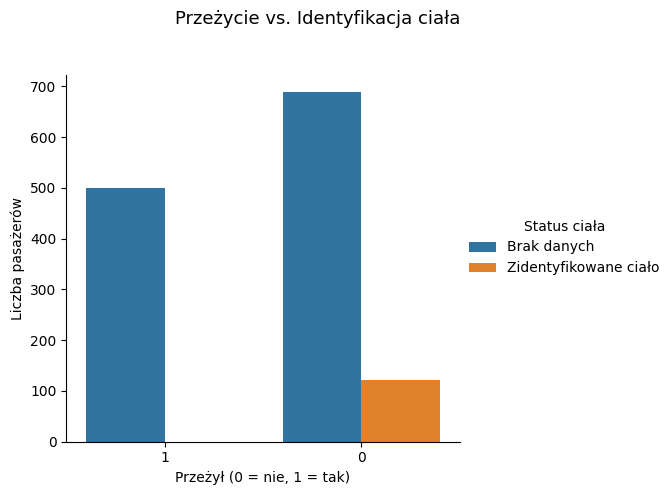

In [15]:
df['body_status'] = df['body_null'].map({0: 'Zidentyfikowane ciało', 1: 'Brak danych'})


g = sns.catplot(x="survived", hue="body_status", kind="count", data=df)
g.set_axis_labels("Przeżył (0 = nie, 1 = tak)", "Liczba pasażerów")
g._legend.set_title("Status ciała")
g.fig.suptitle("Przeżycie vs. Identyfikacja ciała", fontsize=13)
g.fig.subplots_adjust(top=0.85)  

plt.show()



### Wniosek – kolumna `body`

Na podstawie wykresu możemy zauważyć istotną zależność między informacją o identyfikacji ciała a przeżyciem katastrofy:

- Wśród **osób, które przeżyły (survived = 1)**, niemal **wszyscy mają brak danych w kolumnie `body`**, co jest logiczne — nie zginęli, więc nie identyfikowano ich ciał.
- Wśród **osób, które nie przeżyły (survived = 0)**, część miała zidentyfikowane ciało, ale nadal występują liczne braki danych.

### Typ brakujących danych

Braki w kolumnie `body` nie są losowe — są **zależne od zmiennej `survived`**. Oznacza to, że mamy do czynienia z:

> **MNAR (Missing Not At Random)** – brak danych zależy od niewystępujących lub ukrytych informacji, w tym przypadku od faktu przeżycia katastrofy.



# Koluman `home.dest`

In [16]:
df['home_dest_null'] = np.where(df['home.dest'].isnull(), 1, 0)
home_dest_by_survived = df.groupby('survived')['home_dest_null'].mean().round(2) * 100
home_dest_by_survived = home_dest_by_survived.reset_index()
home_dest_by_survived.columns = ['Przeżył (0 = nie, 1 = tak)', 'Braki body (%)']
home_dest_by_survived

,"Przeżył (0 = nie, 1 = tak)",Braki body (%)
0,0,51.0
1,1,31.0


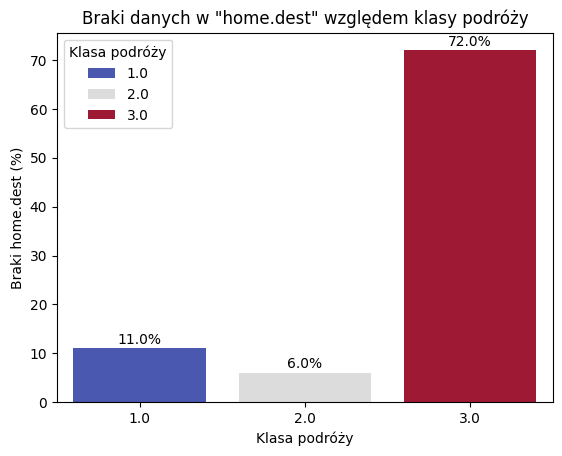

In [18]:
home_dest_by_pclass = df.groupby('pclass')['home_dest_null'].mean().round(2) * 100
home_dest_by_pclass = home_dest_by_pclass.reset_index()
home_dest_by_pclass.columns = ['Klasa podróży', 'Braki home.dest (%)']

sns.barplot(data=home_dest_by_pclass, x='Klasa podróży', y='Braki home.dest (%)', hue='Klasa podróży', palette="coolwarm")

plt.title('Braki danych w "home.dest" względem klasy podróży')
plt.xlabel('Klasa podróży')
plt.ylabel('Braki home.dest (%)')

for index, row in home_dest_by_pclass.iterrows():
    plt.text(index, row['Braki home.dest (%)'] + 1, f"{row['Braki home.dest (%)']}%", ha='center')

plt.show()

### Wniosek – kolumna `home.dest`

Na podstawie wykresu możemy zauważyć wyraźną zależność między klasą podróży (`pclass`) a obecnością braków danych w kolumnie `home.dest`:

- W **1. klasie** braki dotyczą jedynie **11%** pasażerów – dane są w większości kompletne.
- W **2. klasie** odsetek braków spada jeszcze niżej – do **6%**.
- W **3. klasie** aż **72%** pasażerów ma brakujące dane – zdecydowana większość nie posiada informacji o miejscu docelowym.

### Typ brakujących danych

Braki w kolumnie `home.dest` **nie są całkowicie losowe**, ale są **zależne od innej zmiennej obserwowalnej (`pclass`)**, co oznacza, że mamy do czynienia z:

> **MAR (Missing At Random)** – dane brakujące zależą od innych znanych zmiennych (np. klasy podróży), a nie od samej wartości zmiennej `home.dest`.

Taka sytuacja wskazuje, że pasażerowie wyższych klas mieli większe szanse na rejestrację miejsca docelowego, najpewniej ze względu na dokładniejsze procedury ewidencyjne lub większą dbałość o dokumentację.

## 4. Sposób postępowania z brakami danych
### Braki powiązane z innymi zmiennymi (MAR/MNAR)
Jeśli brakujące dane są zależne od innych cech lub ukrytych mechanizmów (np. `age`, `cabin`, `boat`):

- Nie należy ich ignorować – brak sam w sobie może zawierać **ważne dane**.
- Można zastosować:
  - **Imputację warunkową** – np. medianą w grupach według płci i klasy (`groupby`).
  - **Dodanie zmiennej binarnej** oznaczającej brak (`feature_missing`).
  - **Utworzenie nowej kategorii** „Brak” (dla zmiennych kategorycznych).


### Braki nie powiązane z innymi zmiennymi (MCAR)
Jeśli braki danych obejmują tylko **niewielki odsetek zbioru** , jak w przypadku kolumn `embarked` czy `fare`, ich wpływ na analizę jest niewielki.

W takiej sytuacji możliwe działania to:

- **Usunięcie tych wierszy** – jeśli jest ich niewiele i nie zaburza to rozkładu danych.
- **Uzupełnienie braków** odpowiednią wartością statystyczną:
  - **Średnią arytmetyczną**, jeśli zmienna ma rozkład normalny.
  - **Medianą**, gdy dane są asymetryczne.
- Dla zmiennych kategorycznych warto rozważyć:
  - **Najczęściej występującą kategorię** jako domyślną wartość.